In [4]:
import os
import numpy as np


def find_best(task_search, checkpoint):
    log_files_a = os.listdir(checkpoint+"/")
    log_files_b = []



    for file in log_files_a:
        file_split = file.split(".")
        if(file_split[-1]=="txt"):
            file_split_2 = file_split[0].split("_")
            if(file_split_2[0]=="session" and file_split_2[1]==str(task_search)  and int(file_split_2[2])>=0 and int(file_split_2[2])<8):
                log_files_b.append(file)

    best_acc = []
    best_acc_b = []
    for file in log_files_b: 
        f = np.loadtxt(checkpoint+"/"+file, skiprows=1)
        best_acc.append(max(f[-1,-1], f[-1,-2]))
        best_acc_b.append(int(file.split("_")[2]))

    bets_acc = np.array(best_acc)
    bets_acc_b = np.array(best_acc_b)

    a = np.argmax(best_acc)
#     return task_search, best_acc_b[a], best_acc[a]
    return best_acc[a]


attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence
attempt to get argmax of an empty sequence


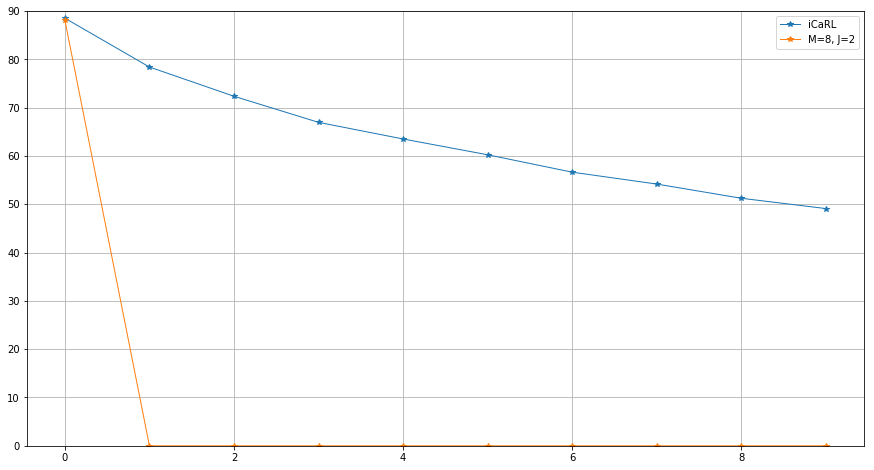

In [11]:
import matplotlib.pyplot as plt 
import numpy as np

x = range(10)
icarl = [88.5, 78.39, 72.34, 66.94, 63.50, 60.23, 56.63, 54.17, 51.23, 49.10]

z = np.zeros_like(icarl)

for j in range(len(icarl)):
    try:
        z[j] = find_best(j, "results/cifar100/RPS_CIFAR_M8_J1/")
    except Exception as e:
        print(e)

plt.figure(figsize=(15,8))
plt.plot(x, icarl, "*-",  linewidth=1, label="iCaRL")
plt.plot(x, z, "*-", linewidth=1, label="M=8, J=2")

plt.grid()
plt.ylim([0,90])
plt.legend()
plt.savefig("me.pdf")